In [10]:
import numpy as np
import matplotlib.pyplot as plt
import csv

#LOSOWY SYGNAŁ

In [ ]:
def deviant_uniform():
  return np.random.uniform(10, 15)

In [ ]:
def deviant_gaussian():
  mean = 0
  sd = 1
  return abs(np.random.normal(mean, sd))

In [ ]:
def gen_signal(n, n_dev, dev_value, min_space, baseline=0):

  result = [baseline] * n
  possible_indexes = list(range(n))

  chosen_indexes = []

  while len(chosen_indexes) < n_dev:

    if not possible_indexes:
      break

    index = np.random.choice(possible_indexes)
    chosen_indexes.append(index)

    possible_indexes = [i for i in possible_indexes if abs(i - index) > min_space]

    if isinstance(dev_value, (int, float, complex)):
      for i in chosen_indexes:
        result[i] = dev_value
    else:
      for i in chosen_indexes:
        result[i] = dev_value()

  return result

In [ ]:
signal = gen_signal(n=100, n_dev=15, dev_value=deviant_uniform, min_space=5)
signal = np.array(signal)

deviant_count = 0
for i in signal:
  if i != 0:
    deviant_count += 1

# print(signal)
print(f"Deviant count: {deviant_count}")

Deviant count: 15


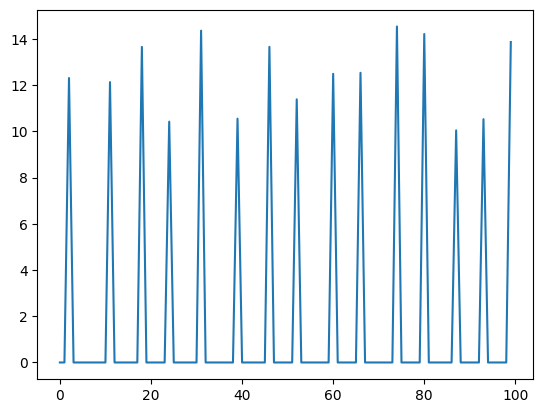

In [ ]:
plt.plot(signal)

In [ ]:
with open('lista.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(signal)

#GENEROWANIE SYGNAŁU Z ARTYKUŁU
'Roving' standard simulation z artykułu "Mismatch negativity potentials and cognitive impairment in schizophrenia"

In [15]:
import numpy as np

#standard: 25 ms
#dewiant: 50 ms

def gen_sequence(hz, ms):
  return np.ones(int(hz*ms/1000))

def gen_train(n, hz):
  standard_seq = gen_sequence(hz, 25)
  deviant_seq = gen_sequence(hz, 50)
  space = np.zeros(int(3/10 * hz))
  result = np.concatenate((standard_seq, space))


  for i in range(n-1):
    result = np.concatenate((result, standard_seq))
    result = np.concatenate((result, space))

  result = np.concatenate((result, deviant_seq))
  result = np.concatenate((result, space))
  return result

def gen_full_signal(hz, n_stimuli_list):
  result = np.array([])
  for i in n_stimuli_list:

    result = np.concatenate((result, gen_train(i, hz)))

    sign = np.random.choice([-1, 1])

    if sign == -1:
      hz += sign * np.random.randint(50, hz-1)
    else:
      hz += sign * np.random.randint(50, 2000 - hz)

  return result


[1. 1. 1. ... 0. 0. 0.]


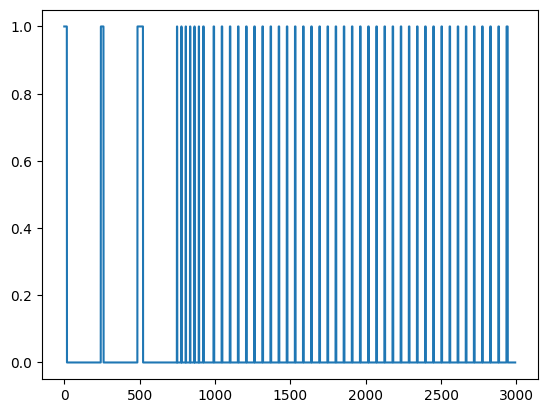

In [16]:
signal = gen_full_signal(750, [2,6,18,36])
print(signal)
plt.plot(signal)

In [17]:
with open('lista.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(signal)